Notas:
--------

   - [x] __Construir la variable Recency.__
        - [x] Sección para caso pequeño
        - [x] Función para estadnarizar
        - [x] Probar esta función
        - [x] Implementar
   - [ ] __Contruir Frecuency__
        - [ ] Sección para caso pequeño
        - [ ] Función para estadnarizar
        - [ ] Probar esta función
        - [ ] Implementar
   - [ ] __Construir Monetary__
        - [ ] Sección para caso pequeño
        - [ ] Función para estadnarizar
        - [ ] Probar esta función
        - [ ] Implementar   

In [3]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [4]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [5]:
#from adjustText import adjust_text
# from adjustText import *

In [6]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [7]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [8]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [9]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [10]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [11]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

##### Abrir Archivo  

In [12]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


#### Funcion

In [13]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [14]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'
            #,'Centro.1':'Centro'
            })
data['Centro_cod']=data['Centro']
data['Centro']=data['Centro.1']

data[data.Año>=int(Año_inicio)]
data.dtypes

Time Lapsed = 0:0:20.49795627593994 
 H:m:s


Zona de ventas          object
Zona de ventas.1        object
Cliente                 object
Cliente.1               object
Cliente - Local         object
Cliente - Local.1       object
Material                object
Día natural             object
Kilos Venta KG           int64
Venta Neta               int64
Precio                   int64
Frecuencia Historica    object
Centro                  object
Centro.1                object
Población               object
Tipo de cliente         object
Cluster                 object
Segmento                object
Segmento.1              object
Categoría Cliente       object
Zona de reparto         object
Año Creación            object
Material Favorito       object
Semana                  object
Mes                     object
Año                      int64
Nivel 4                 object
Nivel 4.1               object
Sector                  object
Tipo de material        object
Tipo de material.1      object
Marca                   object
Nivel 2 

In [15]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

-256

# Selección data(Canal/material)

In [16]:
end_time = time.time()
time_lapsed = end_time - start_time
time_convert(time_lapsed)


Time Lapsed = 0:0:26.912246227264404 
 H:m:s


data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

##### Definición del producto 

In [17]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
print(i_producto
     ,Tipo_de_Cliente)

data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


1010078 Tradicional


### Columnas a usar 
rename aplicado a `Precio promedio`

###### Columnas a usar 

In [18]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la Centro:
'Centro', #'Centro', Centro de distribución de los productos
    #ID Centro, Nombre Centro(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]


###### Ajuste de type de columnas 

In [19]:
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [20]:
#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head(2)

category
(198596, 18)
(198596, 18)
(198596, 18)


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3


##### brebe analisis 

###### Diferencias en filas y columnas, data base 

In [21]:
#======================================
# Disminución de las filas y columnas
# al pasar a data_i
#======================================

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

Data Full (1061161, 40)
-256 3
Data Año (1060905, 43)
-862309 -25
Data Año, Canal Producto (198596, 18)


###### Describe 

In [22]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

,index,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
1,unique,1,NaN,NaN,1140,6,53,12,4.0,46,3,5073,3,3,5,NaN,13,NaN,12


## Dicionario 
rename aplicado a `Precio promedio`

In [23]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
        }

##### Revision

In [24]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))
print((list_))


17
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica']


In [25]:
print(Dic_col.keys())
Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]
print(Columnas_a_usar,len(Columnas_a_usar))
data[Columnas_a_usar].head(2)


dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos'])
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica'] 17


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Centro,Población,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
0,1010077(Trutro Entero Selección),12,1190,10003742,2018-02-09,Viernes,6,2,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19
1,1010077(Trutro Entero Selección),12,1350,10003742,2018-05-04,Viernes,18,5,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19


In [26]:
for i in list(list_+['Tipo de cliente']):
    print(i,data[list_+['Tipo de cliente']].iloc[:1,:][i].to_list())

Material (Nombre) ['1010077(Trutro Entero Selección)']
Kilos Venta KG [12]
Precio [1190]
Cliente ['10003742']
Día natural [datetime.date(2018, 2, 9)]
Día Semana ['Viernes']
Semana ['6']
Mes ['2']
Año [2018]
Centro ['Sucursal Lo Espejo']
Población ['La Pintana']
Cluster ['Clásico']
Segmento.1 ['Cobertura Pequeno SD']
Categoría Cliente ['Especialista en Proc']
Año Creación ['2007']
Material Favorito ['1010077']
Frecuencia Historica ['19']
Tipo de cliente ['Tradicional']


# F Frequency (Frecuencia):

- [ ] __Caracteristica Cliente__

> __La frecuencia historica final del cliente__, esta se puede calcular como se hizo con R. con la ultima compra del cliente.

 - [ ] __Feature of puchad__
> __Columna que representa la frecuencia del cliente al momento de la compra,__ para definir cómo F de cada transacción  influye en el precio.

## inicio
-----------
- Apuntes
- Funciones
- Ecuación
- Prueba con data de un solo cliente
      
 
 


### Intro 

##### Ecuación de \cite(8592638):



\begin{equation}
    W_t=Exp(-K \times t)
\\
F_i= \dfrac{
 \sum_{t=1}^{\textit{AñoActual}-\textit{AñodeInicio}}{W_t}
 \times \dfrac{{Compra}_{i,t}}{\triangle_{i,t}}
}{
\sum_{t=1}^{\textit{AñoActual}-\textit{AñodeInicio}}{W_t}
}
\\
\triangle_{i,t}
 \left\{ \begin{array}{l}
\begin{array}{l}
365 - \textit{Días desde que el cliente apareció},\\
\textbf{\textit{Si} $t=$ \textit{Porción del periodo donde $i$ comenzó a ser cliente}}
\end{array}
\\
\begin{array}{l}
\mbox{ Días que posee el año }t \\
\textbf{\textit{Si} $t=$ 
\textit{Porción del periodo actual}}
\end{array}
\\
\begin{array}{l}
\mbox{ 365} \\
\textbf{\textit{Cualquier otro escenario}}
\end{array}
\end{array} \right.
\end{equation}






##### __Partes de F:__

###### 1. $W_t$


 
`def_W_t(Data,K_cosnt=0.75)`   

Construye un diccionario, de amplitud 1...nsea n la cantidad de años que hay entre el año el año más actual y el año más antiguo.

###### 2. __Fecha primera compra de cada cliente__ 


`def_primera_compra(Data)` => df_a_o_M  

Función que entrega un dataframe con dos columnas     
   - Cliente:(id cliente),
   - Fecha Creacion':(La fecha donde efectuo la primera compra en el dataframe)

###### 3. __Función que calcula__ $\triangle_{i,t}$


 
`array_F_delta(fecha_actual,Fecha_inicio_Ser_Cliente)`Se usa directamente 
     
> Entrega el arreglo que contiene todos los $\triangle_{i,t}$ para un rango de fechas: 
>>   - `fecha_actual`: Puede ser la fecha más actual del dataframe o si se trata de Filas. Es la fecha de la misma transacción.
>>   - `Fecha_inicio_Ser_Cliente`:La fecha donde efectuo la primera compra en el dataframe

> __Esta funcion requiere de las siguientes funciones:__
    >- `F_delta(fecha_actual,Fecha_T,Fecha_inicio_Ser_Cliente)` 
        >> - __Calcula__ $\triangle_{i,t}$
        >> - Requiere de la función `D_num(x)` : Función quen Pasa una fecha a un Numero


###### 4. __Calculo cantidad de transacciones__ ${Compra}_{i,t}$


     
> 3.1.5.1  cantidad de compras que realiza el cliente
 
 >`Val_Compra_i_t(Data,id_Client)` 
 >>Cantidad de compras que realiza el cliente `id_Client` , en los datos Data para cada periodo de tiempo $t$. Requiere las columnas `['Cliente','Día natural']`
 
 
 > __Entrega Data frame:__
 >>df con histiral del compra del cliente
    _con las siguientes columnas_ `['Cliente','Año','Día natural']`
       


###### 5. __Calculo la Frecuencia del cliente en Row__ ${Frecuency}_{i,Row}$


     
> __3.1.6  Función Calculo F_Row:__
 
 >`F_Calculo_Row(Data,Row,W_t_a=W_t_m,df_a_o=df_a_o_M)` 
 >>Cantidad de compras que realiza el cliente `id_Client` , en los datos Data para cada periodo de tiempo $t$. Requiere las columnas `['Cliente','Día natural']`
 

##### Notas 

Sospecho que el calculo debe ser desarrollado por cada cliente, es decir.
For que recorra todos los clientes de dataframe,
Creando un data rfam de cada cliente.


Para esto tambien se hizo una mecanica parecida en R. Que el apply usaba un df con el historaial del cliente y aplicaba la formula

### Data de muestra 

In [25]:
df_m=data_i[(data_i['Población'] =='La Florida')].copy()
df_m.Cliente.unique().shape

(239,)

### W_t 

Los años son desde el 2018 al 2021. Entonces se sabe cuantas porciones se tienen a disposicion

Se construyó una función para ajustar el valor de K de forma más facil.

In [26]:
# obteniendo la amplitud de los años de dataframe, se calcula la amplitud que puede alcanzar W_t
#Se calcula la cantidad de años que existen entre el año más bajo y el año más grande

# max(list(df_m.Año.unique()))- min(list(df_m.Año.unique()))+1
#muestra los que hay entre ambas fechas
print( 'Años de dataframe',[t for t in range(min(list(df_m.Año.unique()))
                ,int(max(list(df_m.Año.unique())))+1)])
#W_t según la cantidad de t que podria existir
print('Valores posibles de t',
      [t+1 for t in range(int(max(list(df_m.Año.unique())))
                          +1-int(min(list(df_m.Año.unique()))))])

def def_W_t(Data,K_cosnt=0.75):
    """
    Función que:
    Entrega un diccionario con los W_t para cada t[1,...,n],
    sea 1 el año actual y n el año más antiguo posible según el Data.Año
    
    Se debe definir la constante K_const.
    """
    #Valores posibles de t
    T=[t+1 for t in range(int(max(list(Data.Año.unique()))) +1 -int(min(list(Data.Año.unique()))))]
    print('Valores posibles de t',T)
    return { t:np.exp(-K_cosnt*t) for t in T}
    
W_t_m=def_W_t(Data=df_m)
print('W_t calculado',W_t_m)

Años de dataframe [2018, 2019, 2020, 2021]
Valores posibles de t [1, 2, 3, 4]
Valores posibles de t [1, 2, 3, 4]
W_t calculado {1: 0.4723665527410147, 2: 0.22313016014842982, 3: 0.10539922456186433, 4: 0.049787068367863944}


### Año de inicio de cada cliente 

In [27]:

def def_primera_compra(Data):
    """
    Función que entrega un dataframe con dos columnas 
    [Cliente:(id cliente),
    'Fecha Creacion':(La fecha donde efectuo la primera compra en el dataframe)]
    """
    start_time_date = time.time()
    df_L=Data.copy()
    # lsitado de todos los clientes
    Id_listado_Clientes=list(df_L.Cliente.unique())
    #Creacion de las fechas de la primera compra en la data df_L
    Creacion_Clientes=[
        df_L[df_L.Cliente== i ][Dic_col['Fecha'][0]].min() 
        for i in Id_listado_Clientes]
    end_time_date = time.time()
    time_convert(end_time_date - start_time_date)
    Data_Creacion_Clientes=pd.DataFrame(data=
             {'Cliente':Id_listado_Clientes
             ,'Fecha Creacion':
              Creacion_Clientes
             })
    Data_Creacion_Clientes.Cliente=\
    Data_Creacion_Clientes.Cliente.astype('category')
    print('Dimenciones',Data_Creacion_Clientes.shape)
    print(
    'Fecha del cliente más Antiguo',Data_Creacion_Clientes['Fecha Creacion'].min(),'\n',
    'Fecha del cliente más Nuevo',Data_Creacion_Clientes['Fecha Creacion'].max()
    )
    return(Data_Creacion_Clientes)
df_a_o_M= def_primera_compra(df_m)
df_a_o_M.head()

Time Lapsed = 0:0:0.22300195693969727 
 H:m:s
Dimenciones (239, 2)
Fecha del cliente más Antiguo 2018-01-02 
 Fecha del cliente más Nuevo 2021-10-16


,Cliente,Fecha Creacion
0,10077788,2020-08-06
1,10130626,2020-02-22
2,10154836,2020-02-21
3,10289403,2019-11-05
4,10289905,2018-08-23


### Calculo de dias en t para cada cliente 

Se puede construir un arreglo para cada cliente,
Con un función que sea dependientede la fecha. por lo cual se requiere conocimiento de lo siguiente:

- Fecha actual.
- Fecha del periodo t.
- Fecha de creación del cliente


#### Calculo de delta 

In [28]:
df_m['Día natural'].to_list()[2]

datetime.date(2020, 8, 27)

In [29]:
def D_num(x):
    """
    Función quen Pasa una fecha a un Numero
    
    Formato x: datetime.date(2020, 8, 27)
    
    df_m['Día natural'].apply(D_num).head()
    """
    return(x-datetime.date(x.year, 1, 1)).days+1
df_m['Día natural'].apply(D_num).head()


62396    219
62397    233
62398    240
62399    244
62400    261
Name: Día natural, dtype: int64

In [30]:
def D_num(x):
    """
    Función quen Pasa una fecha a un Numero
    
    Formato x: datetime.date(2020, 8, 27)
    
    df_m['Día natural'].apply(D_num).head()
    """
    return(x-datetime.date(x.year, 1, 1)).days+1
df_m['Día natural'].apply(D_num).head()

def F_delta_t(fecha_actual,Fecha_t,Fecha_inicio_Ser_Cliente):
    """
    Formato parametros: datetime.date(2020, 8, 27) 
    
   Función que calcula el delta por lo cual se
    requiere conocimiento de lo siguiente:

    - Fecha actual.
    - Fecha del periodo t.
    - Fecha de creación del cliente
    
    Se usa la función D_num para calcular la distancia
    """
    
    #===========================================================
    #  t pertenece al año actual.    
    #------------------------------------------------------------
    if(fecha_actual.year<=Fecha_t.year):
        
        #funcionamiento correcto
        #Fecha del dato es inferior o igual a la actual
        if(fecha_actual>=Fecha_t):
            #Dias de fecha_actual
            
            #si el cliente fue creado en el mismo año actual
            if(fecha_actual.year==Fecha_inicio_Ser_Cliente.year):
                return(D_num(fecha_actual)
                -D_num(Fecha_inicio_Ser_Cliente))
            else:
                return(D_num(fecha_actual))
            
            
        # la fecha_t es más actual que la D_a, 
        else:
            if(Fecha_t.year==Fecha_inicio_Ser_Cliente.year):
                return(D_num(Fecha_t)
                -D_num(Fecha_inicio_Ser_Cliente))
            else:
                return(D_num(Fecha_t))    
            
    #===========================================================
    # la fecha t, pertenece al mismo año donde se creo el cliente
    #------------------------------------------------------------
    elif(Fecha_t.year==Fecha_inicio_Ser_Cliente.year):
        return(
            D_num(datetime.date(Fecha_t.year, 12, 31))
            -D_num(Fecha_inicio_Ser_Cliente))
    #===========================================================
    # Cualquier caso contrario
    #------------------------------------------------------------
    
    else:
        #no puede ser 0, ya que delta es 
        return(D_num(datetime.date(Fecha_t.year, 12, 31)))
    
F_delta_t(datetime.date(2021, 1, 1),
       datetime.date(2022, 1, 1),
        datetime.date(2020,1, 6))

1

#### Calculo del arreglo Delta_t

In [31]:
def array_F_delta(fecha_actual,Fecha_inicio_Ser_Cliente):
    #Fecha_Row
    """
    Formato parametros: datetime.date(2020, 8, 27) 
    
   Función que calcula el delta por lo cual se
    requiere conocimiento de lo siguiente:

    - Fecha actual.
    - Fecha del periodo t.
    - Fecha de creación del cliente
    
    Se usa la función D_num para calcular la distancia
    """
    #Defino la cantidad de T que se tiene según el año actual y el año de inicio
#     if(fecha_actual<Fecha_Row):
#         print('Fecha mal ingresada')
#         return('')
    if(fecha_actual==Fecha_inicio_Ser_Cliente):
        return[1]
    else:
        T=[t+1 for t in range(fecha_actual.year +1 - Fecha_inicio_Ser_Cliente.year)]
        print('Valores posibles de t',T)
        a_delta=[]
        for t in T:
            #verificacion del año
            print(fecha_actual.year - t +1)

            Fecha_T=datetime.date(
                fecha_actual.year-t+1
                , 1, 1)
            a_delta.append(
                F_delta_t(fecha_actual,Fecha_T,Fecha_inicio_Ser_Cliente) )
        return(a_delta)
    
array_F_delta(
        datetime.date(2021,9, 6),
        datetime.date(2018,10, 6))

Valores posibles de t [1, 2, 3, 4]
2021
2020
2019
2018


[249, 366, 365, 86]

### Calculo cantidad de transacciones 

pasos de la funcion:

Se puede construir una arreglo con un valor de F_i_t cosa que despues se suman todos estos valores.

primero necesito calcular el compra i,t para cada uno de los T periodos

##### Defino el cliente a analizar 
Obtener el arreglo de cada uno de las transacciones, según la fecha actual.

Para el ultimo valor esto es más eficiente, proque solo se requiere un groupby

In [32]:
i_id_Cust=list(df_m.Cliente.unique())[0]
print(i_id_Cust,
     df_m[df_m.Cliente==i_id_Cust].shape
     )

10077788 (39, 18)


In [33]:
 df_m[df_m.Cliente==i_id_Cust]['Día natural'].max()

datetime.date(2021, 10, 21)

#### cantidad de compras que realiza el cliente 

In [34]:
def Val_Compra_i_t(Data,id_Client):
    #defino el df
    """
    Cantidad de compras que realiza el cliente id_Client , en los datos Data.
    
    id_Client=Codiggo del Cliente
    Data:df con hisotiral del compra del cliente
    Requiere['Cliente','Año','Día natural']
    
    Entrega Dataframe con [ Cliente Año Compras T] para cada año del cliente
    """
    df_Client=Data[Data.Cliente==id_Client].copy()
    
    fecha_actual=df_Client['Día natural'].max()
    print(fecha_actual)
    fecha_inicio=df_Client['Día natural'].min()
    print(fecha_inicio)
    if 'Año' not in df_Client.columns.to_list():
        df_Client['Año']=df_Client['Día natural'].apply(lambda x: x.year)
    df_G=df_Client.groupby(['Cliente','Año']).count().reset_index()[['Cliente','Año','Día natural']]
    df_G=df_G.rename(columns = {'Día natural':'Compras'})
    df_G=df_G[df_G['Compras']>0]
    #agrego columnas T
    A_max= int(max(list(df_G.Año.unique())))
    df_G['T']=df_G.Año.apply(lambda x: A_max - int(x) +1)
    return df_G

Val_Compra_i_t(df_m,i_id_Cust)

2021-10-21
2020-08-06


,Cliente,Año,Compras,T
2,10077788,2020,16,2
3,10077788,2021,23,1


###### Paso por filas 

In [35]:
df_a_o_M.head()

,Cliente,Fecha Creacion
0,10077788,2020-08-06
1,10130626,2020-02-22
2,10154836,2020-02-21
3,10289403,2019-11-05
4,10289905,2018-08-23


In [36]:
df_m.loc[295794]

Material (Nombre)       1010078(Trutro Entero Selección)
Kilos Venta KG                                        22
Precio                                              1690
Día natural                                   2021-09-14
Día Semana                                        Martes
Semana                                                37
Mes                                           Septiembre
Año                                                 2021
Población                                     La Florida
Centro                               Sucursal Huechuraba
Cliente                                          9966011
Cluster                                          Premium
Segmento.1                          Cobertura Mediano SD
Categoría Cliente                   Especialista en Crud
Año Creación                                        2007
Material Favorito                                1010267
Frecuencia Historica                                 350
Mes_num                        

In [37]:
# W_t_m
df_a_o_M[df_a_o_M.Cliente=='9966011']

,Cliente,Fecha Creacion
238,9966011,2018-01-02


### Función Calculo F_Row 

In [48]:
# W_t_a,df_a_o,
def F_Calculo_Row(Data,Row,W_t_a=W_t_m,df_a_o=df_a_o_M):
    """
    Requiere Parametros glovales:
        W_t_a [Diccionario T={1,2,3,4...n,}]
            construido previamente por: def_W_t
            Listado de los posibles valores de W, según el valor t
        df_a_o
            construido previamente por: def_primera_compra
            Dataframe con la fecha que el cliente es creado
        
    Funciones:
        Val_Compra_i_t 
            Dataframe de la cantidad de compras por T
        
        A_delta:  array_F_delta
            Calcula el listado de los delta i,t 
            según la fecha Row y la Fecha de creación(df_a_o)
        Arreglo con los deltas
    """
    #Se crea la hisotria previa a la fila actual
    i_id_Cust=Row.Cliente
    df_F=Data[(Data.Cliente==i_id_Cust)
             & (Data['Día natural']<=Row['Día natural'])
             ]
    
    print('Cliente y Fecha Row',Row[['Cliente','Día natural']]
          ,'\n Shape',df_F.shape)
    #====================
    #Data Frame return
    #-----------------------------
    
    #construyo un dataframe, que servirá para calcular con las columnas el F
    df_Compras_client=Val_Compra_i_t(df_F,i_id_Cust) 
    
    
    #=============================
    #Arreglo con los delta
    #-----------------------------
    Fecha_Creacion=df_a_o[df_a_o.Cliente==i_id_Cust]['Fecha Creacion'].to_list()[0]
    print('Fecha_Creacion',Fecha_Creacion)
    
    A_delta=array_F_delta(Row['Día natural'],Fecha_Creacion)
    print(A_delta)
    
    
    #===========================================
    #W_t
    #-----------------------------
    
    if (df_Compras_client.shape[0]==1):
        df_Compras_client['W_t'] = W_t_a[df_Compras_client['T'].to_list()[0]]
        print('Sin historia')
        df_Compras_client['Dif_i_t']=A_delta[df_Compras_client['T'].to_list()[0]-1]
        #df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
       
    else:
        df_Compras_client['W_t']=df_Compras_client['T'].apply( lambda x: W_t_a[x])
        df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
    df_Compras_client['F_up']=df_Compras_client.apply( lambda x: x['W_t']*(x['Compras']/x['Dif_i_t'])
                            ,axis=1)
    F_i_Resultado=df_Compras_client['F_up'].sum()\
                    /df_Compras_client['W_t'].astype('float64').sum()
    return (F_i_Resultado,df_Compras_client)
        
    
F_rest=F_Calculo_Row(df_m,
#               df_m.loc[295794])
#               df_m.iloc[1])
                  df_m[df_m.Cliente =='9966011'].tail(1).iloc[0]  )
                     
F_rest#['T']#.apply( lambda x: W_t_m[x])

NameError: name 'W_t_m' is not defined

###### Exploración 

In [39]:
W_t_m

{1: 0.4723665527410147,
 2: 0.22313016014842982,
 3: 0.10539922456186433,
 4: 0.049787068367863944}

In [40]:
F_rest[1]['F_up'].sum()\
/F_rest[1]['W_t'].astype('float64').sum()

0.030419761639769703

## Prueba en un Dataframe

Se vuelven a construir las funciones, para que estas esten alineadas en una sola subsección

### Funciones 

#### def_W_t

In [27]:
def def_W_t(Data,K_cosnt=0.75):
    """
    Función que:
    Entrega un diccionario con los W_t para cada t[1,...,n],
    sea 1 el año actual y n el año más antiguo posible según el Data.Año
    
    Se debe definir la constante K_const.
    """
    #Valores posibles de t
    T=[t+1 for t in range(int(max(list(Data.Año.unique()))) +1 -int(min(list(Data.Año.unique()))))]
    print('Valores posibles de t',T)
    return { t:np.exp(-K_cosnt*t) for t in T}

#### def_primera_compra

In [28]:

def def_primera_compra(Data):
    """
    Función que entrega un dataframe con dos columnas 
    [Cliente:(id cliente),
    'Fecha Creacion':(La fecha donde efectuo la primera compra en el dataframe)]
    """
    start_time_date = time.time()
    df_L=Data.copy()
    # lsitado de todos los clientes
    Id_listado_Clientes=list(df_L.Cliente.unique())
    #Creacion de las fechas de la primera compra en la data df_L
    Creacion_Clientes=[
        df_L[df_L.Cliente== i ][Dic_col['Fecha'][0]].min() 
        for i in Id_listado_Clientes]
    end_time_date = time.time()
    time_convert(end_time_date - start_time_date)
    Data_Creacion_Clientes=pd.DataFrame(data=
             {'Cliente':Id_listado_Clientes
             ,'Fecha Creacion':
              Creacion_Clientes
             })
    Data_Creacion_Clientes.Cliente=\
    Data_Creacion_Clientes.Cliente.astype('category')
    print('Dimenciones',Data_Creacion_Clientes.shape)
    print(
    'Fecha del cliente más Antiguo',Data_Creacion_Clientes['Fecha Creacion'].min(),'\n',
    'Fecha del cliente más Nuevo',Data_Creacion_Clientes['Fecha Creacion'].max()
    )
    return(Data_Creacion_Clientes)
# df_a_o_M= def_primera_compra(df_m)
# df_a_o_M.head()

#### Delta 

###### Función Delta unitario 

In [29]:
def D_num(x):
    """
    Función quen Pasa una fecha a un Numero
    
    Formato x: datetime.date(2020, 8, 27)
    
    df_m['Día natural'].apply(D_num).head()
    """
    return(x-datetime.date(x.year, 1, 1)).days+1
# df_m['Día natural'].apply(D_num).head()

def F_delta_t(fecha_actual,Fecha_t,Fecha_inicio_Ser_Cliente):
    """
    Formato parametros: datetime.date(2020, 8, 27) 
    
   Función que calcula el delta por lo cual se
    requiere conocimiento de lo siguiente:

    - Fecha actual.
    - Fecha del periodo t.
    - Fecha de creación del cliente
    
    Se usa la función D_num para calcular la distancia
    """
    
    #===========================================================
    #  t pertenece al año actual.    
    #------------------------------------------------------------
    if(fecha_actual.year<=Fecha_t.year):
        
        #funcionamiento correcto
        #Fecha del dato es inferior o igual a la actual
        if(fecha_actual>=Fecha_t):
            #Dias de fecha_actual
            
            #si el cliente fue creado en el mismo año actual
            if(fecha_actual.year==Fecha_inicio_Ser_Cliente.year):
                return(D_num(fecha_actual)
                -D_num(Fecha_inicio_Ser_Cliente))
            else:
                return(D_num(fecha_actual))
            
            
        # la fecha_t es más actual que la D_a, 
        else:
            if(Fecha_t.year==Fecha_inicio_Ser_Cliente.year):
                return(D_num(Fecha_t)
                -D_num(Fecha_inicio_Ser_Cliente))
            else:
                return(D_num(Fecha_t))    
            
    #===========================================================
    # la fecha t, pertenece al mismo año donde se creo el cliente
    #------------------------------------------------------------
    elif(Fecha_t.year==Fecha_inicio_Ser_Cliente.year):
        return(
            D_num(datetime.date(Fecha_t.year, 12, 31))
            -D_num(Fecha_inicio_Ser_Cliente))
    #===========================================================
    # Cualquier caso contrario
    #------------------------------------------------------------
    
    else:
        #no puede ser 0, ya que delta es 
        return(D_num(datetime.date(Fecha_t.year, 12, 31)))
    
F_delta_t(datetime.date(2021, 1, 1),
       datetime.date(2022, 1, 1),
        datetime.date(2020,1, 6))

1

###### Delta Array  

In [90]:
def array_F_delta(fecha_actual,Fecha_inicio_Ser_Cliente):
    #Fecha_Row
    """
    Formato parametros: datetime.date(2020, 8, 27) 
    
   Función que calcula el delta por lo cual se
    requiere conocimiento de lo siguiente:

    - Fecha actual.
    - Fecha del periodo t.
    - Fecha de creación del cliente
    
    Se usa la función D_num para calcular la distancia
    """
    #Defino la cantidad de T que se tiene según el año actual y el año de inicio
#     if(fecha_actual<Fecha_Row):
#         print('Fecha mal ingresada')
#         return('')
    if(fecha_actual==Fecha_inicio_Ser_Cliente):
        return[1]
    else:
        T=[t+1 for t in range(fecha_actual.year +1 - Fecha_inicio_Ser_Cliente.year)]
#         print('Valores posibles de t',T)
        a_delta=[]
        for t in T:
            #verificacion del año
#             print(fecha_actual.year - t +1)

            Fecha_T=datetime.date(
                fecha_actual.year-t+1
                , 1, 1)
            F_Val_t= F_delta_t(fecha_actual,Fecha_T,Fecha_inicio_Ser_Cliente) 
            if(F_Val_t<1):
                a_delta.append(1)
            else:
                a_delta.append(F_Val_t)
        return(a_delta)
    
array_F_delta(
        datetime.date(2018,12, 31),
        datetime.date(2018,1, 1))

[364]

#### Calculo cantidad de transacciones 

###### cantidad de compras que realiza el cliente

In [31]:
def Val_Compra_i_t(Data,id_Client):
    #defino el df
    """
    Cantidad de compras que realiza el cliente id_Client , en los datos Data.
    
    id_Client=Codiggo del Cliente
    Data:df con hisotiral del compra del cliente
    Requiere['Cliente','Año','Día natural']
    
    Entrega Dataframe con [ Cliente Año Compras T] para cada año del cliente
    """
    df_Client=Data[Data.Cliente==id_Client].copy()
    
    fecha_actual=df_Client['Día natural'].max()
#     print(fecha_actual)
    fecha_inicio=df_Client['Día natural'].min()
#     print(fecha_inicio)
    if 'Año' not in df_Client.columns.to_list():
        df_Client['Año']=df_Client['Día natural'].apply(lambda x: x.year)
    df_G=df_Client.groupby(['Cliente','Año']).count().reset_index()[['Cliente','Año','Día natural']]
    df_G=df_G.rename(columns = {'Día natural':'Compras'})
    df_G=df_G[df_G['Compras']>0]
    #agrego columnas T
    A_max= int(max(list(df_G.Año.unique())))
    df_G['T']=df_G.Año.apply(lambda x: A_max - int(x) +1)
    return df_G

# Val_Compra_i_t(df_test,i_id_Cust)
# Val_Compra_i_t(df_test,df_test.Cliente.unique()[2])

#### Función Calculo F_Row

###### Con print 

In [39]:
# W_t_a,df_a_o,
# W_t_a=W_t_m,df_a_o=df_a_o_M
def F_Calculo_Row(Data,Row,W_t_a,df_a_o):
    """
    Requiere Parametros glovales:
        W_t_a [Diccionario T={1,2,3,4...n,}]
            construido previamente por: def_W_t
            Listado de los posibles valores de W, según el valor t
        df_a_o
            construido previamente por: def_primera_compra
            Dataframe con la fecha que el cliente es creado
        
    Funciones:
        Val_Compra_i_t 
            Dataframe de la cantidad de compras por T
        
        A_delta:  array_F_delta
            Calcula el listado de los delta i,t 
            según la fecha Row y la Fecha de creación(df_a_o)
        Arreglo con los deltas
    """
    #Se crea la hisotria previa a la fila actual
    i_id_Cust=Row.Cliente
    df_F=Data[(Data.Cliente==i_id_Cust)
             & (Data['Día natural']<=Row['Día natural'])
             ].copy()
    
    print('Cliente y Fecha Row',Row[['Cliente','Día natural']],'\n Shape',df_F.shape)
    #====================
    #Data Frame return
    #-----------------------------
    
    #construyo un dataframe, que servirá para calcular con las columnas el F
    df_Compras_client=Val_Compra_i_t(df_F,i_id_Cust) 
    df_Compras_client['T']=df_Compras_client['T'].astype('int64')
    
    #=============================
    #Arreglo con los delta
    #-----------------------------
    Fecha_Creacion=df_a_o[df_a_o.Cliente==i_id_Cust]['Fecha Creacion'].to_list()[0]
    print('Fecha_Creacion',Fecha_Creacion)
    
    A_delta=array_F_delta(Row['Día natural'],Fecha_Creacion)
    print('Delta',A_delta)
    
    
    #===========================================
    #W_t
    #-----------------------------
    
    if (df_Compras_client.shape[0]==1):
        df_Compras_client['W_t'] = W_t_a[df_Compras_client['T'].to_list()[0]]
#         print('Sin historia')
        df_Compras_client['Dif_i_t']=A_delta[df_Compras_client['T'].to_list()[0]-1]
        #df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
       
    else:
        df_Compras_client['W_t']=df_Compras_client['T'].apply( lambda x: W_t_a[x])
        
        df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
    df_Compras_client['F_up']=df_Compras_client.apply(
        lambda x: x['W_t']*(x['Compras']/x['Dif_i_t'])
                            ,axis=1)
    F_i_Resultado=df_Compras_client['F_up'].sum()\
                    /df_Compras_client['W_t'].astype('float64').sum()
    return (F_i_Resultado,df_Compras_client)

##### Sin  print 

In [40]:
# W_t_a,df_a_o,
# W_t_a=W_t_m,df_a_o=df_a_o_M
def F_Calculo_Row(Data,Row,W_t_a,df_a_o):
    """
    Requiere Parametros glovales:
        W_t_a [Diccionario T={1,2,3,4...n,}]
            construido previamente por: def_W_t
            Listado de los posibles valores de W, según el valor t
        df_a_o
            construido previamente por: def_primera_compra
            Dataframe con la fecha que el cliente es creado
        
    Funciones:
        Val_Compra_i_t 
            Dataframe de la cantidad de compras por T
        
        A_delta:  array_F_delta
            Calcula el listado de los delta i,t 
            según la fecha Row y la Fecha de creación(df_a_o)
        Arreglo con los deltas
    """
    #Se crea la hisotria previa a la fila actual
    i_id_Cust=Row.Cliente
    df_F=Data[(Data.Cliente==i_id_Cust)
             & (Data['Día natural']<=Row['Día natural'])
             ].copy()
    
    #print('Cliente y Fecha Row',Row[['Cliente','Día natural']],'\n Shape',df_F.shape)
    #====================
    #Data Frame return
    #-----------------------------
    
    #construyo un dataframe, que servirá para calcular con las columnas el F
    df_Compras_client=Val_Compra_i_t(df_F,i_id_Cust) 
    df_Compras_client['T']=df_Compras_client['T'].astype('int64')
    
    #=============================
    #Arreglo con los delta
    #-----------------------------
    Fecha_Creacion=df_a_o[df_a_o.Cliente==i_id_Cust]['Fecha Creacion'].to_list()[0]
    ##print('Fecha_Creacion',Fecha_Creacion)
    
    A_delta=array_F_delta(Row['Día natural'],Fecha_Creacion)
    #print('Delta',A_delta)
    
    
    #===========================================
    #W_t
    #-----------------------------
    
    if (df_Compras_client.shape[0]==1):
        df_Compras_client['W_t'] = W_t_a[df_Compras_client['T'].to_list()[0]]
#         ##print('Sin historia')
        df_Compras_client['Dif_i_t']=A_delta[df_Compras_client['T'].to_list()[0]-1]
        #df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
       
    else:
        df_Compras_client['W_t']=df_Compras_client['T'].apply( lambda x: W_t_a[x])
        df_Compras_client['Dif_i_t']=df_Compras_client['T'].apply( lambda x: A_delta[x-1])
        
    df_Compras_client['F_up']=df_Compras_client.apply( lambda x: x['W_t']*(x['Compras']/x['Dif_i_t'])
                            ,axis=1)
    F_i_Resultado=df_Compras_client['F_up'].sum()\
                    /df_Compras_client['W_t'].astype('float64').sum()
    return (F_i_Resultado,df_Compras_client)

### Calculos base

#### Data de prueba

In [41]:
df_test=data_i[(data_i['Población'] =='La Florida')].copy()
df_test.Cliente.unique().shape

(239,)

#### Parametros 

In [42]:
W_t_test= def_W_t(df_test)
df_0_test =def_primera_compra(df_test)

Valores posibles de t [1, 2, 3, 4]
Time Lapsed = 0:0:0.20919036865234375 
 H:m:s
Dimenciones (239, 2)
Fecha del cliente más Antiguo 2018-01-02 
 Fecha del cliente más Nuevo 2021-10-16


### Testeos 

#### Resultado una fila 

##### Funciona 

In [43]:
F_Calculo_Row(df_test 
              ,df_test[df_test.Cliente =='9966011'].tail(1).iloc[0]
              ,W_t_test
              ,df_0_test
             )

(0.030419761639769703,
    Cliente   Año  Compras  T       W_t  Dif_i_t      F_up
 0  9966011  2018       17  4  0.049787      363  0.002332
 1  9966011  2019        1  3  0.105399      365  0.000289
 2  9966011  2020        8  2  0.223130      366  0.004877
 3  9966011  2021       10  1  0.472367      257  0.018380)

##### No funcionaba (Solucionado) 

In [44]:
df_0_test
W_t_test

{1: 0.4723665527410147,
 2: 0.22313016014842982,
 3: 0.10539922456186433,
 4: 0.049787068367863944}

In [45]:
df_F_result=F_Calculo_Row(df_test 
              ,df_test[df_test.Cliente =='9966011'].loc[295776]
              ,W_t_a=W_t_test
              ,df_a_o=df_0_test
             )#.apply( lambda x: W_t_test[x])

df_F_result

(0.02068451151246249,
    Cliente   Año  Compras  T       W_t  Dif_i_t      F_up
 0  9966011  2018       17  2  0.223130      363  0.010450
 1  9966011  2019        1  1  0.472367      120  0.003936)

#### Nueva data de un solo cliente 

##### Parametros 

In [47]:
df_test_Cust=df_test[df_test.Cliente =='9966011'].copy()
df_test_Cust.shape

(36, 18)

In [48]:
W_t_test= def_W_t(df_test_Cust)
df_0_test =def_primera_compra(df_test_Cust)

Valores posibles de t [1, 2, 3, 4]
Time Lapsed = 0:0:0.0010008811950683594 
 H:m:s
Dimenciones (1, 2)
Fecha del cliente más Antiguo 2018-01-02 
 Fecha del cliente más Nuevo 2018-01-02


##### Aplicacion

In [136]:
#Alerta generada por no usar Copy()
df_test_Cust['Frecuency_Row']=df_test_Cust.apply( 
    (lambda x: F_Calculo_Row(df_test_Cust,x
                            ,W_t_test
                            ,df_0_test
                            )[0]
    ) , axis=1)

Cliente y Fecha Row Cliente           9966011
Día natural    2018-01-02
Name: 295759, dtype: object 
 Shape (1, 18)
Fecha_Creacion 2018-01-02
Delta [1]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-02-10
Name: 295760, dtype: object 
 Shape (2, 18)
Fecha_Creacion 2018-01-02
Delta [39]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-03-10
Name: 295761, dtype: object 
 Shape (3, 18)
Fecha_Creacion 2018-01-02
Delta [67]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-03-20
Name: 295762, dtype: object 
 Shape (4, 18)
Fecha_Creacion 2018-01-02
Delta [77]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-03-29
Name: 295763, dtype: object 
 Shape (5, 18)
Fecha_Creacion 2018-01-02
Delta [86]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-04-07
Name: 295764, dtype: object 
 Shape (6, 18)
Fecha_Creacion 2018-01-02
Delta [95]
Cliente y Fecha Row Cliente           9966011
Día natural    2018-05-10
Name: 29576

###### Resultados 

In [128]:
df_test_Cust[# Dic_col['Base'] + 
             ['Frecuency_Row'] + Dic_col['Fecha']]

,Frecuency_Row,Día natural,Día Semana,Semana,Mes,Año
295759,1.000000,2018-01-02,Martes,1,Enero,2018
295760,0.051282,2018-02-10,Sábado,6,Febrero,2018
295761,0.044776,2018-03-10,Sábado,10,Marzo,2018
295762,0.051948,2018-03-20,Martes,12,Marzo,2018
295763,0.058140,2018-03-29,Jueves,13,Marzo,2018
295764,0.063158,2018-04-07,Sábado,14,Abril,2018
295765,0.054688,2018-05-10,Jueves,19,Mayo,2018
295766,0.051948,2018-06-05,Martes,23,Junio,2018
295767,0.052941,2018-06-21,Jueves,25,Junio,2018
295768,0.055866,2018-06-30,Sábado,26,Junio,2018


<AxesSubplot:>

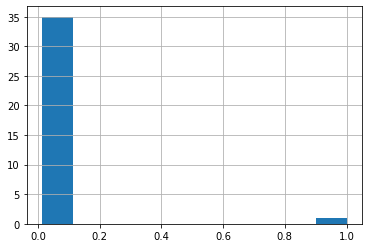

In [130]:
df_test_Cust['Frecuency_Row'].hist()

#### Data Florida  

In [137]:
W_t_test= def_W_t(df_test)
df_0_test =def_primera_compra(df_test)

Valores posibles de t [1, 2, 3, 4]
Time Lapsed = 0:0:0.2091827392578125 
 H:m:s
Dimenciones (239, 2)
Fecha del cliente más Antiguo 2018-01-02 
 Fecha del cliente más Nuevo 2021-10-16


In [142]:
#Alerta generada por no usar Copy()
start_time_3 = time.time()
df_test['Frecuency_Row']=df_test.apply( 
    (lambda x: F_Calculo_Row(df_test,x
                            ,W_t_test
                            ,df_0_test
                            )[0]
    ) , axis=1)
end_time_3 = time.time()
time_lapsed_3 = end_time_3 - start_time_3
print('FRecuency de data_test')
time_convert(time_lapsed_3)

FRecuency de data_test
Time Lapsed = 0:1:28.152032375335693 
 H:m:s


### Uso real data_i 

#### Data Total  1010078 Tradicional

In [49]:
data_i_F=data_i.copy()
data_i_F.shape

(198596, 18)

In [50]:
W_t_pruf= def_W_t(data_i_F)
df_0_pruf =def_primera_compra(data_i_F)

Valores posibles de t [1, 2, 3, 4]
Time Lapsed = 0:0:50.36072587966919 
 H:m:s
Dimenciones (5073, 2)
Fecha del cliente más Antiguo 2018-01-02 
 Fecha del cliente más Nuevo 2021-10-23


#### Aplicacion  

#####  Error en la aplicación

In [151]:
#Alerta generada por no usar Copy()
start_time_3 = time.time()
data_i_F['Frecuency_Row']=data_i_F.apply( 
    (lambda x: F_Calculo_Row(data_i_F,x
                            ,W_t_pruf
                            ,df_0_pruf
                            )[0]
    ) , axis=1)
end_time_3 = time.time()
time_lapsed_3 = end_time_3 - start_time_3
print('FRecuency de data_test')
time_convert(time_lapsed_3)

ZeroDivisionError: division by zero

###### Revison del error 

In [51]:
df_0_pruf

,Cliente,Fecha Creacion
0,10003742,2020-05-23
1,10007508,2018-03-01
2,10017269,2018-01-27
3,10023880,2018-12-28
4,10028999,2019-11-05
...,...,...
5068,9992154,2018-10-03
5069,9993925,2018-01-02
5070,9994662,2020-02-10
5071,9994800,2020-12-16


In [52]:
df_0_pruf['Fecha Creacion'].to_list()[0]

datetime.date(2020, 5, 23)

In [53]:
df_0_pruf.iloc[1858]

Cliente             15929479
Fecha Creacion    2018-12-31
Name: 1858, dtype: object

In [91]:
for i in range(df_0_pruf.shape[0]) :
    for y in range(2018,2022):
        if((datetime.date(y, 5, 23)>=df_0_pruf['Fecha Creacion'].to_list()[i])):
            A= array_F_delta(datetime.date(y, 5, 23)
                        #df_0_pruf['Fecha Creacion'].to_list()[i]
                      ,df_0_pruf['Fecha Creacion'].to_list()[i])
            if(min(A) < 1):
                print(A,i,y)

In [67]:
array_F_delta(datetime.date(2020, 12, 31),
                            datetime.date(2019, 12, 31)
             )

[366, 0]

##### Post Error 

In [92]:
#Alerta generada por no usar Copy()
start_time_3 = time.time()
data_i_F['Frecuency_Row']=data_i_F.apply( 
    (lambda x: F_Calculo_Row(data_i_F,x
                            ,W_t_pruf
                            ,df_0_pruf
                            )[0]
    ) , axis=1)
end_time_3 = time.time()
time_lapsed_3 = end_time_3 - start_time_3
print('FRecuency de data_test')
time_convert(time_lapsed_3)

FRecuency de data_test
Time Lapsed = 1:25:59.123647689819336 
 H:m:s


#### SAVE CSV  

In [93]:
File_save_CSV=file_direct_O+'data_1010078_CT F'+'.csv'

data_i_F.to_csv(File_save_CSV, encoding='utf-8',index=True,sep=';')

end_time_4 = time.time()
time_lapsed_4 = end_time_4 - end_time_3
time_lapsed_final = end_time_4 - start_time

print('Guardado df')
time_convert(time_lapsed_4)

print('Recency total codigo')
time_convert(time_lapsed_final)

Guardado df
Time Lapsed = 0:0:1.592038631439209 
 H:m:s
Recency total codigo
Time Lapsed = 2:0:25.870452880859375 
 H:m:s


# Analisis de resultados

In [97]:
data_i_F.columns

Index(['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Día natural',
       'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro', 'Cliente',
       'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación',
       'Material Favorito', 'Frecuencia Historica', 'Mes_num',
       'Frecuency_Row'],
      dtype='object')

In [98]:
data_i_F[['Día natural']+Dic_col['Base']+['Frecuency_Row']]

,Día natural,Material (Nombre),Kilos Venta KG,Precio,Cliente,Frecuency_Row
61455,2020-05-23,1010078(Trutro Entero Selección),22,1300,10003742,1.000000
61456,2018-03-01,1010078(Trutro Entero Selección),110,1174,10007508,1.000000
61457,2018-03-08,1010078(Trutro Entero Selección),66,1174,10007508,0.285714
61458,2018-03-20,1010078(Trutro Entero Selección),66,1033,10007508,0.157895
61459,2018-03-27,1010078(Trutro Entero Selección),65,1100,10007508,0.153846
...,...,...,...,...,...,...
297036,2021-10-14,1010078(Trutro Entero Selección),22,1450,9994662,0.016376
297037,2020-12-16,1010078(Trutro Entero Selección),22,1390,9994800,1.000000
297038,2021-06-09,1010078(Trutro Entero Selección),22,1150,9994800,0.025633
297039,2021-06-30,1010078(Trutro Entero Selección),22,1150,9994800,0.028893


<AxesSubplot:>

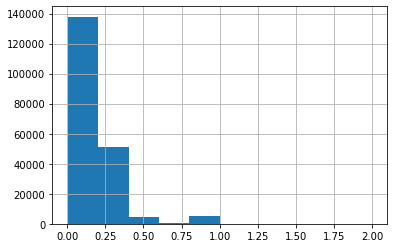

In [99]:
data_i_F['Frecuency_Row'].hist()

In [108]:
np.log(1)

0.0

<AxesSubplot:>

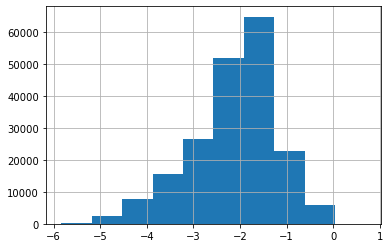

In [104]:
data_i_F['Frecuency_Row'].apply(lambda x: np.log(x)).hist()